## **Principal Component Analysis (PCA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../Data/student_grades.csv')

In [3]:
data.shape

(100, 9)

In [4]:
data.head()

,student_id,math,science,cs,band,english,history,spanish,physed
0,1,46,48,50,74,34,44,39,73
1,2,66,65,65,66,74,80,75,63
2,3,55,53,50,76,71,72,76,71
3,4,53,57,53,80,77,77,85,82
4,5,55,62,58,67,82,77,78,60


In [5]:
X = data.drop('student_id',axis=1)

In [6]:
X.head()

,math,science,cs,band,english,history,spanish,physed
0,46,48,50,74,34,44,39,73
1,66,65,65,66,74,80,75,63
2,55,53,50,76,71,72,76,71
3,53,57,53,80,77,77,85,82
4,55,62,58,67,82,77,78,60


In [7]:
## Feasture scaling with mean-cebtered features
X_centred = X - X.mean()

In [8]:
X_centred.mean()

math       2.842171e-15
science    1.136868e-15
cs         0.000000e+00
band      -6.252776e-15
english    1.136868e-15
history    2.842171e-16
spanish   -2.273737e-15
physed     5.684342e-16
dtype: float64

In [9]:
X_centred.shape[1]

8

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_centred)         

PCA(n_components=2)

In [24]:
pca.explained_variance_ratio_

array([0.81844937, 0.09778153])

In [25]:
sum(pca.explained_variance_ratio_)

np.float64(0.9162308999794647)

In [26]:
pca.get_feature_names_out()

array(['pca0', 'pca1'], dtype=object)

## **Interpreting and Visualizing PCA**

In [27]:
## View and interpret the components of PCA model
pca.components_

array([[ 0.34433892,  0.34662586,  0.32733313, -0.00417335,  0.45552196,
         0.46095972,  0.48354746,  0.01773586],
       [ 0.45069884,  0.44923506,  0.47433583,  0.096715  , -0.33260806,
        -0.31949261, -0.35110809,  0.15725648]])

In [28]:
X.columns

Index(['math', 'science', 'cs', 'band', 'english', 'history', 'spanish',
       'physed'],
      dtype='object')

In [29]:
pd.DataFrame(pca.transform(X_centred))

,0,1
0,-39.221331,18.961672
1,30.547249,2.935450
2,13.219471,-9.100237
3,24.467554,-11.418090
4,27.082869,-9.821059
...,...,...
95,63.675338,21.111107
96,-32.313890,5.453383
97,-46.598534,-9.315532
98,-30.982464,3.862003


In [30]:
## Plot the students with PC1 and PC2
X_transformed = pd.DataFrame(pca.transform(X_centred), columns=['PC1','PC2'])

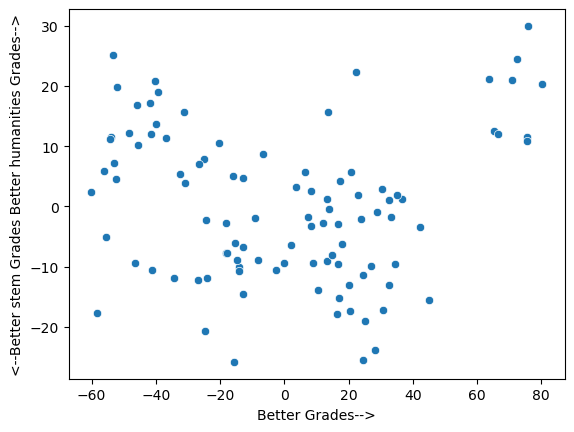

In [33]:
sns.scatterplot(
            X_transformed,
            x='PC1',
            y='PC2',
)
plt.xlabel('Better Grades-->')
plt.ylabel('<--Better stem Grades Better humanities Grades-->')
plt.show();